<a href="https://colab.research.google.com/github/huanfachen/WBE-sample-site-planning/blob/main/WBE_site_selection_maximise_coverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WBE site selection for maximising coverage

## Loading data from Github repo

In [ ]:
# prompt: check duplicates of uwwCode column and print how many values in this column have duplicates

import pandas as pd

# Assuming the file is in your Google Drive's My Drive
file_path = "/content/drive/My Drive/UK_UWWT_geospatial_population_estimates.csv"

try:
  df = pd.read_csv(file_path)
  print("File loaded successfully.")

  print(f"Number of rows in UK_UWWT_geospatial_population_estimates: {df.shape[0]}")
  print(f"Is uwwCode an unique identifier? {df.uwwCode.is_unique}")
  # Check for duplicates in the 'uwwCode' column
  duplicates = df[df.duplicated(subset=['uwwCode'], keep=False)]
  num_duplicates = len(duplicates)

  print(f"Number of values in 'uwwCode' with duplicates: {num_duplicates}")

except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")


File loaded successfully.
Number of rows in UK_UWWT_geospatial_population_estimates: 8695
Is uwwCode an unique identifier? False
Number of values in 'uwwCode' with duplicates: 8686


In [ ]:
# prompt: load the csv file of catchment_IMD_2019_pop.csv from Google drive as a pandas dataframe called df_catchment_imd; print the columns

import pandas as pd
from google.colab import drive
# drive.mount('/content/drive')

# Assuming the file is in your Google Drive's My Drive
file_path = "/content/drive/My Drive/catchment_IMD_2019_pop.csv"

try:
  df_catchment_imd = pd.read_csv(file_path)
  print("File loaded successfully.")
  print(df_catchment_imd.columns)

except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")


File loaded successfully.
Index(['identifier', 'pop_IMD_1', 'pop_IMD_2', 'pop_IMD_3', 'pop_IMD_4',
       'pop_IMD_5', 'pop_IMD_6', 'pop_IMD_7', 'pop_IMD_8', 'pop_IMD_9',
       'pop_IMD_10', 'total_estimate_pop'],
      dtype='object')


In [ ]:
# prompt: print columns of df

df.columns


Index(['identifier', 'name', 'uwwCode', 'uwwName', 'distance', 'year',
       'uwwState', 'rptMStateKey', 'uwwLatitude', 'uwwLongitude',
       'uwwLoadEnteringUWWTP', 'uwwCapacity', 'version', 'norm_total_area',
       'norm_area_covered', 'norm_intersection_sum'],
      dtype='object')

In [ ]:
# prompt: print the number of row for each value in the year column. Do not load the dataset again.

print(df.groupby('year').size())


year
2006    1342
2008    1353
2010    1482
2012    1492
2014    1509
2016    1517
dtype: int64


In [ ]:
# prompt: keep only the data of year=2016. Do not reload the data.

df = df[df['year'] == 2016]
print(df.groupby('year').size())


year
2016    1517
dtype: int64


In [ ]:
print(df.uwwCode.head)

<bound method NDFrame.head of 5       UKENAN_AW_TP000001
11      UKENAN_AW_TP000002
17      UKENAN_AW_TP000003
23      UKENAN_AW_TP000004
29      UKENAN_AW_TP000005
               ...        
8677    UKWAWA_WW_TP000126
8683    UKWAWA_WW_TP000127
8687    UKWAWA_WW_TP000130
8691    UKWAWA_WW_TP000131
8694    UKWAWA_WW_TP000132
Name: uwwCode, Length: 1517, dtype: object>


In [ ]:
# prompt: load England_EMHP_site_303.csv from Google Drive and name it as df_emhp_sites. Print the columns. Check if all values of the column "Site code" are within the uwwCode column of df. Please inner join df_emhp_sites and df as df_joined, and then add a column of 'population_aligned' to represent if the "Population" value is the same as 'uwwCapacity'

import pandas as pd
from google.colab import drive

# Load the England_EMHP_site_303.csv file
file_path_emhp = "/content/drive/My Drive/England_EMHP_site_303.csv"  # Replace with the actual path
try:
  df_emhp_sites = pd.read_csv(file_path_emhp)
  print("EMHP Sites file loaded successfully.")
  print(df_emhp_sites.columns)
except FileNotFoundError:
  print(f"Error: EMHP Sites file not found at {file_path_emhp}")
except Exception as e:
  print(f"An error occurred while loading EMHP Sites file: {e}")

print(f'number of EMHP sites: {df_emhp_sites.shape[0]}')
# Check if all values of "Site code" are in df['uwwCode']
if 'Site code' in df_emhp_sites.columns and 'uwwCode' in df.columns:
    site_codes_emhp = set(df_emhp_sites['Site code'].astype(str))
    site_codes_df = set(df['uwwCode'].astype(str))
    missing_codes = site_codes_emhp - site_codes_df
    if missing_codes:
        print("Warning: The following 'Site code' values from EMHP Sites are not found in 'uwwCode' column of the other dataframe:")
        print(missing_codes)
    else:
        print("'Site code' values are all present in 'uwwCode'.")
else:
    print("Error: 'Site code' or 'uwwCode' columns not found in the respective DataFrames.")


# Inner join df_emhp_sites and df
try:
  df_joined = pd.merge(df_emhp_sites, df, left_on='Site code', right_on='uwwCode', how='inner')
  print("DataFrames joined successfully.")
except KeyError as e:
    print(f"Error during join: {e}")
except Exception as e:
    print(f"An error occurred during the join operation: {e}")

# Add 'population_aligned' column that indicates if Population == uwwCapacity
if 'Population' in df_joined.columns and 'uwwCapacity' in df_joined.columns:
    df_joined['population_aligned'] = df_joined['Population'] == df_joined['uwwCapacity']
    print("'population_aligned' column added.")
else:
    print("Error: 'Population' or 'uwwCapacity' columns not found in the joined DataFrame.")


EMHP Sites file loaded successfully.
Index(['Region name', 'Site code', 'Site name', 'Population'], dtype='object')
number of EMHP sites: 303
{'UKENTH_TWU_TP000126', 'UKENSO_SW_TP000002', 'UKENTH_TWU_TP000102', 'UKENNE_YW_TP000141', 'UKENTH_TWU_TP000073', 'UKENMI_ST_TP000142', 'UKENAN_AW_TP000051', 'UKENTH_TWU_TP000021', 'UKENNW_UU_TP000017', 'UKENNW_UU_TP000023', 'UKENMI_ST_TP000207', 'UKENNE_YW_TP000054', 'UKENMI_ST_TP000141', 'UKENNW_UU_TP000047', 'UKENTH_TWU_TP000125', 'UKENTH_TWU_TP000103', 'UKENNE_YW_TP000119'}
DataFrames joined successfully.
'population_aligned' column added.


In [ ]:
# prompt: print first few rows of df_joined. Summarise the number of true and false in the population_aligned column

# Display the first few rows of df_joined
print(df_joined.head())

# Summarize the 'population_aligned' column
population_aligned_counts = df_joined['population_aligned'].value_counts()
print("\nSummary of 'population_aligned' column:")
population_aligned_counts


     Region name           Site code         Site name Population  identifier  \
0  East Midlands  UKENAN_AW_TP000004            Anwick      5,866  4fc3fdb9d5   
1  East Midlands  UKENAN_AW_TP000023            Boston     38,150  6c25b6e136   
2  East Midlands  UKENAN_AW_TP000026            Bourne     21,752  4ce5dd8c6a   
3  East Midlands  UKENAN_AW_TP000028        Brackley       14,040  6fe29ea350   
4  East Midlands  UKENAN_AW_TP000037  Wellingborough      208,434  10760432ea   

             name             uwwCode               uwwName  distance  year  \
0          Anwick  UKENAN_AW_TP000004            ANWICK STW       0.0  2016   
1          Boston  UKENAN_AW_TP000023            BOSTON STW       0.0  2016   
2          Bourne  UKENAN_AW_TP000026            BOURNE STW       0.0  2016   
3  Brackley (New)  UKENAN_AW_TP000028        BRACKLEY   STW       0.0  2016   
4      Broadholme  UKENAN_AW_TP000037  WELLINGBOROUGH   STW       0.0  2016   

   ... rptMStateKey uwwLatitude  uwwLo

,count
population_aligned,
False,286


In [ ]:
# prompt: print "columns of df" followed by the columns of df. Note, please transform columns of df from Index to str before printing.
print("columns of df: ", list(df.columns.astype(str)))

columns of df:  ['identifier', 'name', 'uwwCode', 'uwwName', 'distance', 'year', 'uwwState', 'rptMStateKey', 'uwwLatitude', 'uwwLongitude', 'uwwLoadEnteringUWWTP', 'uwwCapacity', 'version', 'norm_total_area', 'norm_area_covered', 'norm_intersection_sum']


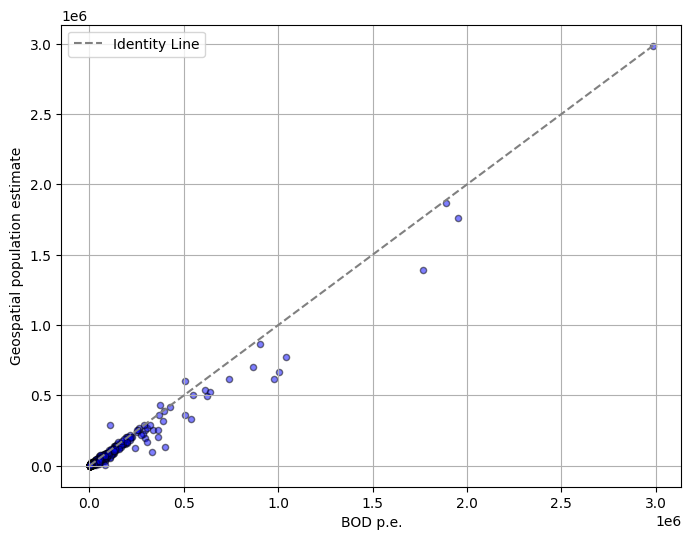

<Figure size 640x480 with 0 Axes>

In [ ]:
# prompt: I want to plot a scatterplot between uwwLoadEnteringUWWTP and norm_intersection_sum column of the dataframe of df (not df_joined) and add a line of x=y

import matplotlib.pyplot as plt

# Assuming 'uwwLoadEnteringUWWTP' and 'norm_intersection_sum' are in df
if 'uwwLoadEnteringUWWTP' in df.columns and 'norm_intersection_sum' in df.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['uwwLoadEnteringUWWTP'], df['norm_intersection_sum'],
            s=20,  # adjust size as needed
            alpha=0.5, # Adjust transparency as needed
            edgecolor='black', # Set the edge color to black
            linewidth=1,  # Adjust the linewidth for thicker or thinner outlines
            facecolor='#0000ff')

    plt.xlabel('BOD p.e.')
    plt.ylabel('Geospatial population estimate')
    # plt.title('Scatter Plot of uwwLoadEnteringUWWTP vs. norm_intersection_sum')

    # Add x=y line
    min_val = min(df['uwwLoadEnteringUWWTP'].min(), df['norm_intersection_sum'].min())
    max_val = max(df['uwwLoadEnteringUWWTP'].max(), df['norm_intersection_sum'].max())
    plt.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--', label='Identity Line')
    plt.legend()

    plt.grid(True)
    plt.show()
    plt.savefig('scatter_plot_BODpe_GeoPopEstimate.tiff', dpi=300)
    plt.savefig('scatter_plot_BODpe_GeoPopEstimate.png', dpi=300)
else:
    print("Error: 'uwwLoadEnteringUWWTP' or 'norm_intersection_sum' columns not found in the DataFrame.")


In [ ]:
# prompt: To calculate the Pearson correlation of uwwLoadEnteringUWWTP and norm_intersection_sum column in df and report the p-values with 8 digits

from scipy.stats import pearsonr

if 'uwwLoadEnteringUWWTP' in df.columns and 'norm_intersection_sum' in df.columns:
    correlation, p_value = pearsonr(df['uwwLoadEnteringUWWTP'], df['norm_intersection_sum'])
    print(f"Pearson correlation: {correlation}")
    print(f"P-value: {p_value:.8f}")
else:
    print("Error: 'uwwLoadEnteringUWWTP' or 'norm_intersection_sum' columns not found in the DataFrame.")


Pearson correlation: 0.9872059288081633
P-value: 0.00000000


In [ ]:
# prompt: To calculate the Spearman correlation of uwwLoadEnteringUWWTP and norm_intersection_sum column in df and report the p-values with 8 digits

from scipy.stats import spearmanr

if 'uwwLoadEnteringUWWTP' in df.columns and 'norm_intersection_sum' in df.columns:
    correlation, p_value = spearmanr(df['uwwLoadEnteringUWWTP'], df['norm_intersection_sum'])
    print(f"Spearman correlation: {correlation}")
    print(f"P-value: {p_value:.8f}")
else:
    print("Error: 'uwwLoadEnteringUWWTP' or 'norm_intersection_sum' columns not found in the DataFrame.")


Spearman correlation: 0.9654019450872169
P-value: 0.00000000


In [ ]:
# prompt: create a line plot of the first 500 values in cumulative_load

# Assuming 'cumulative_load' is a column in your DataFrame 'df'
if 'cumulative_load' in df.columns:
  plt.figure(figsize=(10, 6))
  plt.plot(df['cumulative_load'].iloc[:500])  # Plot the first 500 values
  plt.xlabel('Index')
  plt.ylabel('Cumulative Load')
  plt.title('Line Plot of Cumulative Load (First 500 Values)')
  plt.grid(True)
  plt.show()
else:
  print("Error: 'cumulative_load' column not found in the DataFrame.")


How many selections of STWs are identical when uwwLoadEnteringUWWTP and norm_intersection_sum columns are used?  5
Proportion of IDENTICAL selections:  1.00%


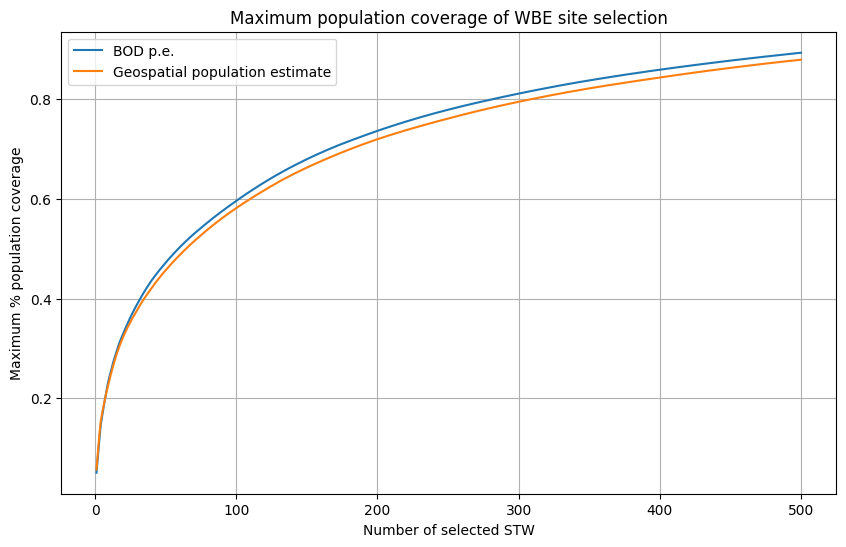

In [ ]:
# prompt: using df, I want to generate a line plot. In this plot, the x axis represents the number of rows being selected. There are two lines in this plot, Line A and B. For each point in Line A (x, y), y is the sum of 'uwwLoadEnteringUWWTP' column when the x row of the largest uwwLoadEnteringUWWTP value is selected. Line B follows this idea but uses uwwCapacity column instead of uwwLoadEnteringUWWTP. Please add a legend of these two lines, using legend value of uwwLoadEnteringUWWTP and uwwCapacity, respectively. Please use labels of 'Number of selected STW' and 'Maximal coverage' for x and y axis. In this plot, I want to add a two-colour shade for each x value, which represents whether the rows selected by these two lines are the same.

import matplotlib.pyplot as plt

# Assuming df is already loaded as in the previous code

# Sort the DataFrame by 'uwwLoadEnteringUWWTP' in descending order
df_sorted_load = df.sort_values('uwwLoadEnteringUWWTP', ascending=False)
# Sort the DataFrame by 'norm_intersection_sum' in descending order
df_sorted_capacity = df.sort_values('norm_intersection_sum', ascending=False)

# Calculate cumulative sums for both columns
cumulative_load = df_sorted_load['uwwLoadEnteringUWWTP'].cumsum()/df_sorted_load['uwwLoadEnteringUWWTP'].sum()
cumulative_capacity = df_sorted_capacity['norm_intersection_sum'].cumsum()/df_sorted_capacity['norm_intersection_sum'].sum()

# maximal number of selected STWs
max_n_selected_STW = 500

# Generate x values (number of selected rows)
x_values = range(1, max_n_selected_STW + 1)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot Line A (uwwLoadEnteringUWWTP)
plt.plot(x_values, cumulative_load.iloc[:max_n_selected_STW], label='BOD p.e.')

# Plot Line B (norm_intersection_sum)
plt.plot(x_values, cumulative_capacity.iloc[:max_n_selected_STW], label='Geospatial population estimate')

# Add shading
# Create a boolean array indicating where the selected rows are the same
comparison_selection = []
for k in range(1, max_n_selected_STW + 1):
    set1 = set(df_sorted_load.index[:k])
    set2 = set(df_sorted_capacity.index[:k])
    comparison_selection.append(set1 == set2)

print(f"How many selections of STWs are identical when uwwLoadEnteringUWWTP and norm_intersection_sum columns are used?  {sum(comparison_selection)}")
print(f"Proportion of IDENTICAL selections:  {(sum(comparison_selection) / len(comparison_selection)) * 100:.2f}%")

# # Find the indices where the comparison_selection array changes
# change_points = [i for i in range(len(comparison_selection) -1) if comparison_selection[i] != comparison_selection[i+1]] + [len(comparison_selection) -1]
# # print(change_points)
# # Iterate through the change points to create alternating shaded regions
# start_idx = 0
# for idx in change_points:
#     if comparison_selection[start_idx]:
#         plt.fill_between(x_values[start_idx:idx+1], cumulative_load[start_idx:idx+1], cumulative_capacity[start_idx:idx+1], color='skyblue', alpha=0.4)
#     else:
#         plt.fill_between(x_values[start_idx:idx+1], cumulative_load[start_idx:idx+1], cumulative_capacity[start_idx:idx+1], color='yellow', alpha=0.4)
#     start_idx = idx +1


# Add labels, title, and legend
plt.xlabel('Number of selected STW')
plt.ylabel('Maximum % population coverage')
plt.title('Maximum population coverage of WBE site selection')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


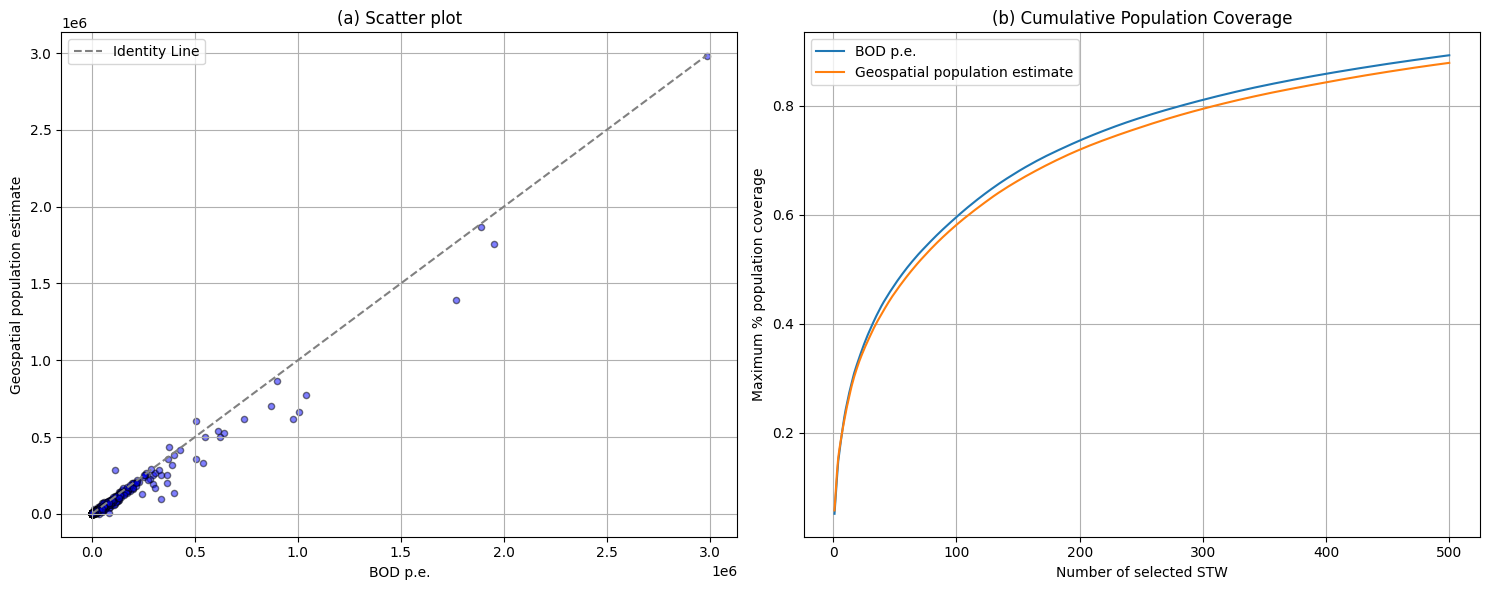

In [ ]:
# prompt: Combine the plots in the previous two cells into one plot (one row and two columns), which is labelled by (a) and (b)

import matplotlib.pyplot as plt

# Assuming df, cumulative_load, cumulative_capacity, and x_values are defined from previous cells

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1 (Scatter plot)
axes[0].scatter(df['uwwLoadEnteringUWWTP'], df['norm_intersection_sum'],
                s=20, alpha=0.5, edgecolor='black', linewidth=1, facecolor='#0000ff')
axes[0].set_xlabel('BOD p.e.')
axes[0].set_ylabel('Geospatial population estimate')
min_val = min(df['uwwLoadEnteringUWWTP'].min(), df['norm_intersection_sum'].min())
max_val = max(df['uwwLoadEnteringUWWTP'].max(), df['norm_intersection_sum'].max())
axes[0].plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--', label='Identity Line')
axes[0].legend()
axes[0].grid(True)
axes[0].set_title("(a) Scatter plot")


# Plot 2 (Cumulative sum plot)
axes[1].plot(x_values, cumulative_load.iloc[:max_n_selected_STW], label='BOD p.e.')
axes[1].plot(x_values, cumulative_capacity.iloc[:max_n_selected_STW], label='Geospatial population estimate')
axes[1].set_xlabel('Number of selected STW')
axes[1].set_ylabel('Maximum % population coverage')
axes[1].legend()
axes[1].grid(True)
axes[1].set_title("(b) Cumulative Population Coverage")

plt.tight_layout()
plt.show()


In [ ]:
print(df.shape[0])

1517


In [ ]:
# prompt: inner join df_catchment_imd (using column identifier) and df (using column identifier) as a new dataframe called df_catchment_imd_joined. Print the number of rows.

# Inner join df_catchment_imd and df using 'identifier' column
df_catchment_imd_joined = pd.merge(df_catchment_imd, df, on='identifier', how='inner')

# Print the number of rows in the joined DataFrame
print(f"Number of rows in df_catchment_imd_joined: {df_catchment_imd_joined.shape[0]}")


Number of rows in df_catchment_imd_joined: 1408


In [ ]:
# prompt: in df_catchment_imd_joined, create two new columns called pop_imd_1_to_5 (the sum of 'pop_IMD_1', 'pop_IMD_2', 'pop_IMD_3', 'pop_IMD_4', 'pop_IMD_5') and pop_imd_6_to_10 (the sum of 'pop_IMD_6', 'pop_IMD_7', 'pop_IMD_8', 'pop_IMD_9', 'pop_IMD_10').

# Create new columns for the sum of population in IMD categories 1-5 and 6-10
df_catchment_imd_joined['pop_imd_1_to_5'] = df_catchment_imd_joined[['pop_IMD_1', 'pop_IMD_2', 'pop_IMD_3', 'pop_IMD_4', 'pop_IMD_5']].sum(axis=1)
df_catchment_imd_joined['pop_imd_6_to_10'] = df_catchment_imd_joined[['pop_IMD_6', 'pop_IMD_7', 'pop_IMD_8', 'pop_IMD_9', 'pop_IMD_10']].sum(axis=1)


**Comparing coverage of deprived and less deprived population, using two strategies: 'Maximising total coverage' and 'Prioritising the deprived'**

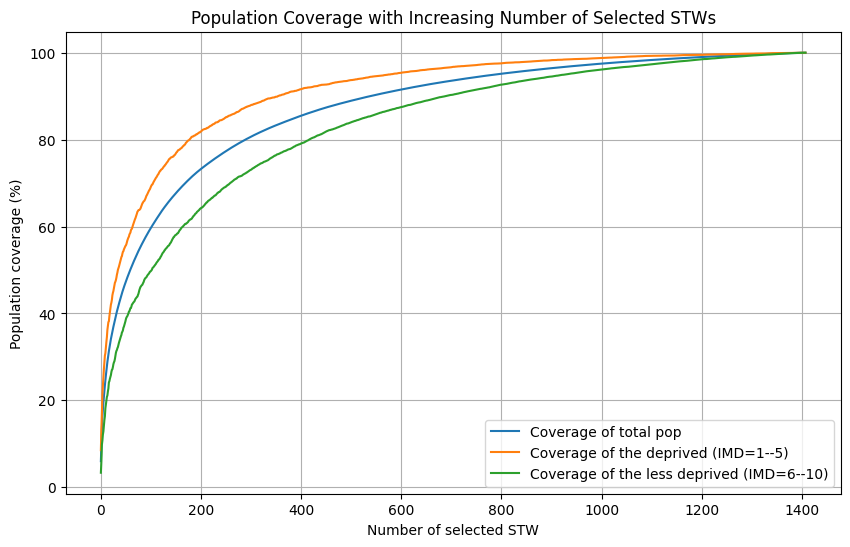

In [ ]:
# prompt: Please sort df_catchment_imd_joined in the descent order of the column of total_estimate_pop and save it as a new dataframe called df_catchment_imd_joined_descending_total_pop. I want to generate a line plot. In this plot, the x axis represents the number of rows being selected. The x axis is labelled 'Number of selected STW' and the y axis is labelled 'Population coverage (%)'. The x axis contains the value from 0 to the number of rows of df_catchment_imd_joined. There are three lines in this plot, called A, B, and C. A represents the accumulative proportion of total_estimate_pop column (in relation to the total of this column). B represents the accumulative proportion of pop_imd_1_to_5 column (in relation to the total of this column). C represents the accumulative proportion of pop_imd_6_to_10 column (in relation to the total of this column). In the legend, please use 'Coverage of total pop', 'Coverage of the deprived (IMD=1--5)' and 'Coverage of the less deprived (IMD=6--10)'.

df_catchment_imd_joined_descending_total_pop = df_catchment_imd_joined.sort_values('total_estimate_pop', ascending=False)

# Calculate cumulative sums for each column
total_pop_cumsum = df_catchment_imd_joined_descending_total_pop['total_estimate_pop'].cumsum() / df_catchment_imd_joined_descending_total_pop['total_estimate_pop'].sum()
pop_imd_1_to_5_cumsum = df_catchment_imd_joined_descending_total_pop['pop_imd_1_to_5'].cumsum() / df_catchment_imd_joined_descending_total_pop['pop_imd_1_to_5'].sum()
pop_imd_6_to_10_cumsum = df_catchment_imd_joined_descending_total_pop['pop_imd_6_to_10'].cumsum() / df_catchment_imd_joined_descending_total_pop['pop_imd_6_to_10'].sum()

# Generate x values (number of selected rows)
x_values = range(df_catchment_imd_joined.shape[0])

# Create the plot
plt.figure(figsize=(10, 6))

# Plot Line A (total_estimate_pop)
plt.plot(x_values, total_pop_cumsum * 100, label='Coverage of total pop')

# Plot Line B (pop_imd_1_to_5)
plt.plot(x_values, pop_imd_1_to_5_cumsum * 100, label='Coverage of the deprived (IMD=1--5)')

# Plot Line C (pop_imd_6_to_10)
plt.plot(x_values, pop_imd_6_to_10_cumsum * 100, label='Coverage of the less deprived (IMD=6--10)')


# Add labels, title, and legend
plt.xlabel('Number of selected STW')
plt.ylabel('Population coverage (%)')
plt.title('Population Coverage with Increasing Number of Selected STWs')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


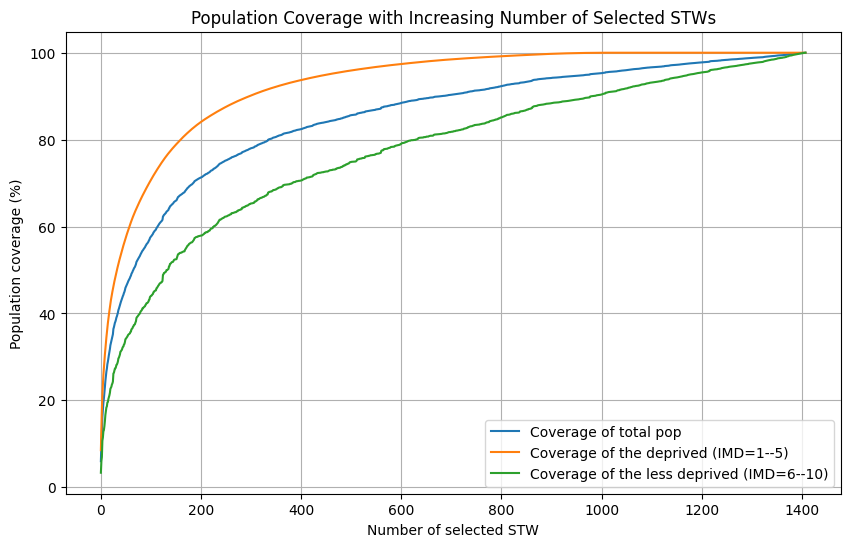

In [ ]:
# prompt: Please sort df_catchment_imd_joined in the descent order of the column of pop_imd_1_to_5 and save it as a new dataframe called df_catchment_imd_joined_descending_imd_1_to_5. I want to generate a line plot. In this plot, the x axis represents the number of rows being selected. The x axis is labelled 'Number of selected STW' and the y axis is labelled 'Population coverage (%)'. The x axis contains the value from 0 to the number of rows of df_catchment_imd_joined. There are three lines in this plot, called A, B, and C. A represents the accumulative proportion of total_estimate_pop column (in relation to the total of this column). B represents the accumulative proportion of pop_imd_1_to_5 column (in relation to the total of this column). C represents the accumulative proportion of pop_imd_6_to_10 column (in relation to the total of this column). In the legend, please use 'Coverage of total pop', 'Coverage of the deprived (IMD=1--5)' and 'Coverage of the less deprived (IMD=6--10)'.

df_catchment_imd_joined_descending_imd_1_to_5 = df_catchment_imd_joined.sort_values('pop_imd_1_to_5', ascending=False)

# Calculate cumulative sums for each column
total_pop_cumsum = df_catchment_imd_joined_descending_imd_1_to_5['total_estimate_pop'].cumsum() / df_catchment_imd_joined_descending_imd_1_to_5['total_estimate_pop'].sum()
pop_imd_1_to_5_cumsum = df_catchment_imd_joined_descending_imd_1_to_5['pop_imd_1_to_5'].cumsum() / df_catchment_imd_joined_descending_imd_1_to_5['pop_imd_1_to_5'].sum()
pop_imd_6_to_10_cumsum = df_catchment_imd_joined_descending_imd_1_to_5['pop_imd_6_to_10'].cumsum() / df_catchment_imd_joined_descending_imd_1_to_5['pop_imd_6_to_10'].sum()

# Generate x values (number of selected rows)
x_values = range(df_catchment_imd_joined.shape[0])

# Create the plot
plt.figure(figsize=(10, 6))

# Plot Line A (total_estimate_pop)
plt.plot(x_values, total_pop_cumsum * 100, label='Coverage of total pop')

# Plot Line B (pop_imd_1_to_5)
plt.plot(x_values, pop_imd_1_to_5_cumsum * 100, label='Coverage of the deprived (IMD=1--5)')

# Plot Line C (pop_imd_6_to_10)
plt.plot(x_values, pop_imd_6_to_10_cumsum * 100, label='Coverage of the less deprived (IMD=6--10)')


# Add labels, title, and legend
plt.xlabel('Number of selected STW')
plt.ylabel('Population coverage (%)')
plt.title('Population Coverage with Increasing Number of Selected STWs')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


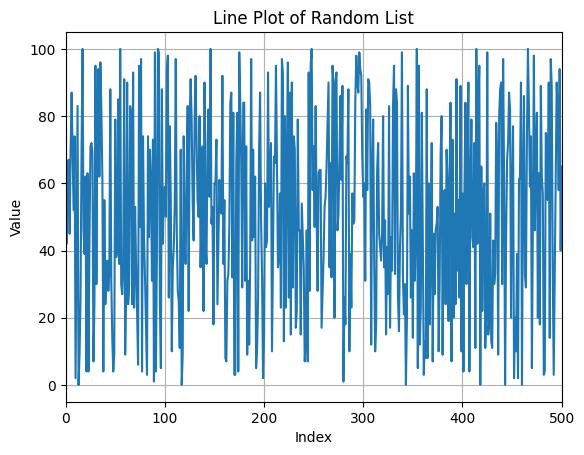

In [ ]:
# prompt: generate a random list with 1000 values, make a line plot, and then restrict the x axis value to 500

import random
import matplotlib.pyplot as plt

# Generate a random list with 1000 values
random_list = [random.randint(0, 100) for _ in range(1000)]

# Create a line plot
plt.plot(random_list)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot of Random List')

# Restrict the x-axis to 500
plt.xlim(0, 500)

plt.grid(True)
plt.show()


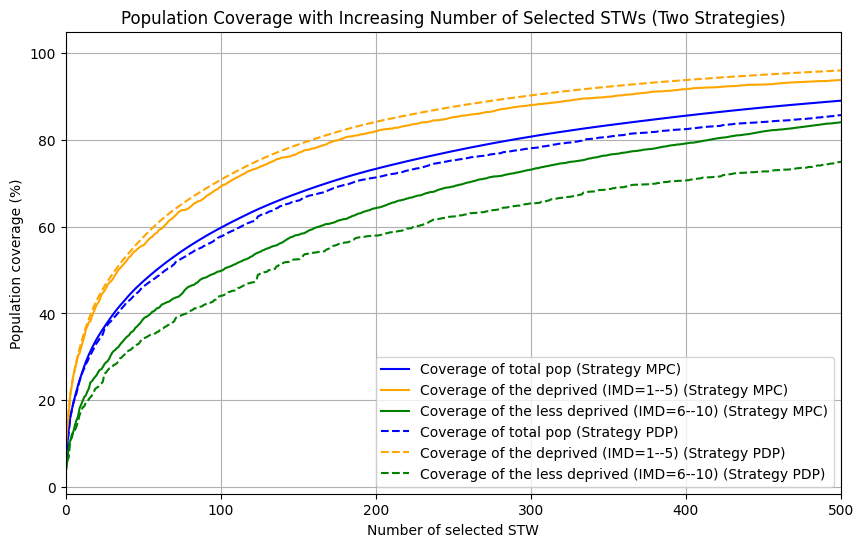

In [ ]:
# prompt: please combine the two line plots in the previous two cells (which generated df_catchment_imd_joined_descending_total_pop and df_catchment_imd_joined_descending_imd_1_to_5) into one plot (comprising six lines). Please keep the colour scheme and use ordinary line for the former lines and dotted line for the latter lines.

# Assuming df_catchment_imd_joined_descending_total_pop and
# df_catchment_imd_joined_descending_imd_1_to_5 are defined from previous cells

plt.figure(figsize=(10, 6))

# Calculate cumulative sums for each column
total_pop_cumsum = df_catchment_imd_joined_descending_total_pop['total_estimate_pop'].cumsum() / df_catchment_imd_joined_descending_total_pop['total_estimate_pop'].sum()
pop_imd_1_to_5_cumsum = df_catchment_imd_joined_descending_total_pop['pop_imd_1_to_5'].cumsum() / df_catchment_imd_joined_descending_total_pop['pop_imd_1_to_5'].sum()
pop_imd_6_to_10_cumsum = df_catchment_imd_joined_descending_total_pop['pop_imd_6_to_10'].cumsum() / df_catchment_imd_joined_descending_total_pop['pop_imd_6_to_10'].sum()

# Plot lines from df_catchment_imd_joined_descending_total_pop
plt.plot(x_values, total_pop_cumsum * 100, label='Coverage of total pop (Strategy MPC)', color = 'blue')
plt.plot(x_values, pop_imd_1_to_5_cumsum * 100, label='Coverage of the deprived (IMD=1--5) (Strategy MPC)', color = 'orange')
plt.plot(x_values, pop_imd_6_to_10_cumsum * 100, label='Coverage of the less deprived (IMD=6--10) (Strategy MPC)', color = 'green')

# Calculate cumulative sums for each column
total_pop_cumsum = df_catchment_imd_joined_descending_imd_1_to_5['total_estimate_pop'].cumsum() / df_catchment_imd_joined_descending_imd_1_to_5['total_estimate_pop'].sum()
pop_imd_1_to_5_cumsum = df_catchment_imd_joined_descending_imd_1_to_5['pop_imd_1_to_5'].cumsum() / df_catchment_imd_joined_descending_imd_1_to_5['pop_imd_1_to_5'].sum()
pop_imd_6_to_10_cumsum = df_catchment_imd_joined_descending_imd_1_to_5['pop_imd_6_to_10'].cumsum() / df_catchment_imd_joined_descending_imd_1_to_5['pop_imd_6_to_10'].sum()

# Plot lines from df_catchment_imd_joined_descending_imd_1_to_5 using dotted style
plt.plot(x_values, total_pop_cumsum * 100, linestyle='--', label='Coverage of total pop (Strategy PDP)', color = 'blue')
plt.plot(x_values, pop_imd_1_to_5_cumsum * 100, linestyle='--', label='Coverage of the deprived (IMD=1--5) (Strategy PDP)', color = 'orange')
plt.plot(x_values, pop_imd_6_to_10_cumsum * 100, linestyle='--', label='Coverage of the less deprived (IMD=6--10) (Strategy PDP)', color = 'green')

# Add labels, title, and legend
plt.xlabel('Number of selected STW')
plt.ylabel('Population coverage (%)')
plt.title('Population Coverage with Increasing Number of Selected STWs (Two Strategies)')
plt.legend()

# Restrict the x-axis to
max_n_selected_STW = 500
plt.xlim(0, max_n_selected_STW)

# Display the plot
plt.grid(True)
plt.show()


In [ ]:
# prompt: print the value of the six lines in the previous cell at x=500, including three for Strategy MPC and three for Strategy PDP

# Assuming df_catchment_imd_joined_descending_total_pop and
# df_catchment_imd_joined_descending_imd_1_to_5 are defined from previous cells

x_values = range(df_catchment_imd_joined.shape[0])
max_n_selected_STW = 500

# Calculate cumulative sums for each column (Strategy MPC)
total_pop_cumsum = df_catchment_imd_joined_descending_total_pop['total_estimate_pop'].cumsum() / df_catchment_imd_joined_descending_total_pop['total_estimate_pop'].sum()
pop_imd_1_to_5_cumsum = df_catchment_imd_joined_descending_total_pop['pop_imd_1_to_5'].cumsum() / df_catchment_imd_joined_descending_total_pop['pop_imd_1_to_5'].sum()
pop_imd_6_to_10_cumsum = df_catchment_imd_joined_descending_total_pop['pop_imd_6_to_10'].cumsum() / df_catchment_imd_joined_descending_total_pop['pop_imd_6_to_10'].sum()

# Calculate cumulative sums for each column (Strategy PDP)
total_pop_cumsum_pdp = df_catchment_imd_joined_descending_imd_1_to_5['total_estimate_pop'].cumsum() / df_catchment_imd_joined_descending_imd_1_to_5['total_estimate_pop'].sum()
pop_imd_1_to_5_cumsum_pdp = df_catchment_imd_joined_descending_imd_1_to_5['pop_imd_1_to_5'].cumsum() / df_catchment_imd_joined_descending_imd_1_to_5['pop_imd_1_to_5'].sum()
pop_imd_6_to_10_cumsum_pdp = df_catchment_imd_joined_descending_imd_1_to_5['pop_imd_6_to_10'].cumsum() / df_catchment_imd_joined_descending_imd_1_to_5['pop_imd_6_to_10'].sum()

print("Strategy MPC at x=500:")
print("Coverage of total pop:", total_pop_cumsum.iloc[500-1] * 100)
print("Coverage of the deprived (IMD=1--5):", pop_imd_1_to_5_cumsum.iloc[500-1] * 100)
print("Coverage of the less deprived (IMD=6--10):", pop_imd_6_to_10_cumsum.iloc[500-1] * 100)


print("\nStrategy PDP at x=500:")
print("Coverage of total pop:", total_pop_cumsum_pdp.iloc[500-1] * 100)
print("Coverage of the deprived (IMD=1--5):", pop_imd_1_to_5_cumsum_pdp.iloc[500-1] * 100)
print("Coverage of the less deprived (IMD=6--10):", pop_imd_6_to_10_cumsum_pdp.iloc[500-1] * 100)



Strategy MPC at x=500:
Coverage of total pop: 88.9287160795176
Coverage of the deprived (IMD=1--5): 93.69007323098964
Coverage of the less deprived (IMD=6--10): 83.94688333528332

Strategy PDP at x=500:
Coverage of total pop: 85.60159119902639
Coverage of the deprived (IMD=1--5): 95.90232137670061
Coverage of the less deprived (IMD=6--10): 74.82388365545243
